## import

In [49]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import math

## DF -  ratings,movies,tags

In [50]:
path = "/Users/koosup/PycharmProjects/NCF/dataset/movielens"
#path = os.curdir+ "/NCF/dataset/movielens"
ratings_df = pd.read_csv(os.path.join(path, 'ratings.csv'), encoding='utf-8')
movies_df = pd.read_csv(os.path.join(path, 'movies.csv'), index_col='movieId', encoding='utf-8')
tags_df = pd.read_csv(os.path.join(path, 'tags.csv'), encoding='utf-8')

In [51]:
def get_df_info(df):
    print("size : ", df.shape)
    print("=================================================================")
    print("=================================================================")
    print("info : ", df.info())
    print("=================================================================")
    print("=================================================================")
    print("statistics\n", df.describe())
    print("=================================================================")
    print("=================================================================")
    print(df.head(5))

In [52]:
get_df_info(ratings_df)

size :  (100836, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
info :  None
statistics
               userId        movieId         rating     timestamp
count  100836.000000  100836.000000  100836.000000  1.008360e+05
mean      326.127564   19435.295718       3.501557  1.205946e+09
std       182.618491   35530.987199       1.042529  2.162610e+08
min         1.000000       1.000000       0.500000  8.281246e+08
25%       177.000000    1199.000000       3.000000  1.019124e+09
50%       325.000000    2991.000000       3.500000  1.186087e+09
75%       477.000000    8122.000000       4.000000  1.435994e+09
max       610.000000  193609.

In [53]:
get_df_info(movies_df)

size :  (9742, 2)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9742 entries, 1 to 193609
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   9742 non-null   object
 1   genres  9742 non-null   object
dtypes: object(2)
memory usage: 228.3+ KB
info :  None
statistics
               title genres
count          9742   9742
unique         9737    951
top     Eros (2004)  Drama
freq              2   1053
                                      title  \
movieId                                       
1                          Toy Story (1995)   
2                            Jumanji (1995)   
3                   Grumpier Old Men (1995)   
4                  Waiting to Exhale (1995)   
5        Father of the Bride Part II (1995)   

                                              genres  
movieId                                               
1        Adventure|Animation|Children|Comedy|Fantasy  
2                         Adventu

In [54]:
get_df_info(tags_df)

size :  (3683, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB
info :  None
statistics
             userId        movieId     timestamp
count  3683.000000    3683.000000  3.683000e+03
mean    431.149335   27252.013576  1.320032e+09
std     158.472553   43490.558803  1.721025e+08
min       2.000000       1.000000  1.137179e+09
25%     424.000000    1262.500000  1.137521e+09
50%     474.000000    4454.000000  1.269833e+09
75%     477.000000   39263.000000  1.498457e+09
max     610.000000  193565.000000  1.537099e+09
   userId  movieId              tag   timestamp
0       2    60756            funny  1445714994
1       2    60756  Highly quotable  

## ratings_df

In [55]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [56]:
print("데이터 수:" , len(ratings_df))

데이터 수: 100836


In [57]:
#num of users
print("유저 수 : ",len(ratings_df["userId"].unique()))

유저 수 :  610


In [58]:
#num of movies
print("영화(item) 수 : ", len(ratings_df["movieId"].unique()))

영화(item) 수 :  9724


array([[<AxesSubplot:title={'center':'userId'}>,
        <AxesSubplot:title={'center':'movieId'}>],
       [<AxesSubplot:title={'center':'rating'}>, <AxesSubplot:>]],
      dtype=object)

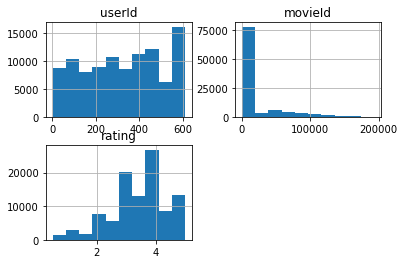

In [59]:
ratings_df[["userId","movieId","rating"]].hist()

In [60]:
ratings_df.groupby(["userId","rating"]).size()

userId  rating
1       1.0         1
        2.0         5
        3.0        26
        4.0        76
        5.0       124
                 ... 
610     3.0       230
        3.5       315
        4.0       286
        4.5       148
        5.0       180
Length: 3976, dtype: int64

In [61]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Text(0, 0.5, 'rating')

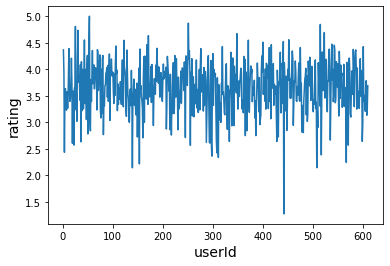

In [62]:
#mean rating per user
ratings_df.groupby(['userId'])['rating'].mean().plot()
plt.xlabel("userId",fontsize=14)
plt.ylabel("rating",fontsize=14)

<AxesSubplot:xlabel='userId'>

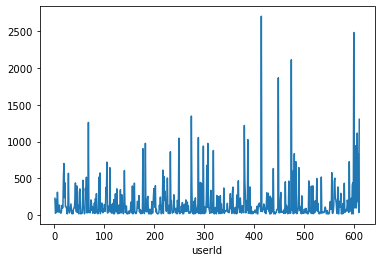

In [63]:
#num rating per user
ratings_df.groupby(['userId'])['rating'].size().plot()

<AxesSubplot:xlabel='movieId'>

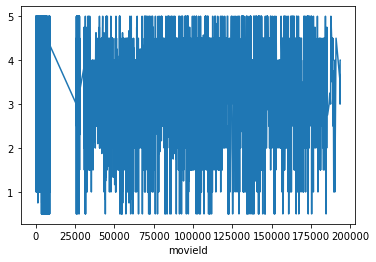

In [64]:
#mean rating per movie
ratings_df.groupby(["movieId"])['rating'].mean().plot()

<AxesSubplot:xlabel='movieId'>

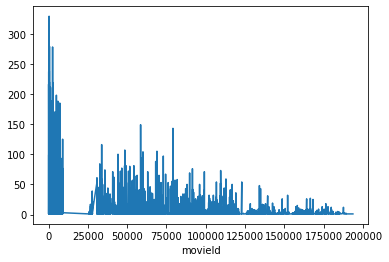

In [65]:
#num rating per movie
ratings_df.groupby(["movieId"])['rating'].size().plot()

In [66]:
df = ratings_df.groupby("userId")
df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
99534,610,1,5.0,1479542900
99535,610,6,5.0,1493850345
99536,610,16,4.5,1479542171
99537,610,32,4.5,1479543331


In [161]:
user_movie_df = ratings_df.pivot(
            index = "userId",
            columns = "movieId",
            values = "rating").fillna(0)

user_movie_df

### not working fillna method..
#can't recognize np.nan in m1 miniforge anaconda. but working in anaconda
### so i made new dataframe with same lows,cols

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,2.5,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [151]:
user_movie_df_new = pd.DataFrame(index = user_movie_df.index,
                                columns=user_movie_df.columns).fillna(0)  

In [152]:
user_movie_df_new

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
607,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
608,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [153]:
for col in user_movie_df.columns:
    user_movie_df_new.iloc[:][col]= user_movie_df.iloc[:][col].apply(lambda x : 0 if math.isnan(x) else 1)

In [156]:
from scipy.sparse import csr_matrix

In [162]:
user_movie_sparse = csr_matrix(user_movie_df_new.values)

In [163]:
print(user_movie_sparse_df)

  (0, 0)	1
  (0, 2)	1
  (0, 5)	1
  (0, 43)	1
  (0, 46)	1
  (0, 62)	1
  (0, 89)	1
  (0, 97)	1
  (0, 124)	1
  (0, 130)	1
  (0, 136)	1
  (0, 184)	1
  (0, 190)	1
  (0, 197)	1
  (0, 201)	1
  (0, 224)	1
  (0, 257)	1
  (0, 275)	1
  (0, 291)	1
  (0, 307)	1
  (0, 314)	1
  (0, 320)	1
  (0, 325)	1
  (0, 367)	1
  (0, 384)	1
  :	:
  (609, 9238)	1
  (609, 9246)	1
  (609, 9256)	1
  (609, 9268)	1
  (609, 9274)	1
  (609, 9279)	1
  (609, 9282)	1
  (609, 9288)	1
  (609, 9304)	1
  (609, 9307)	1
  (609, 9312)	1
  (609, 9317)	1
  (609, 9324)	1
  (609, 9339)	1
  (609, 9341)	1
  (609, 9348)	1
  (609, 9371)	1
  (609, 9372)	1
  (609, 9374)	1
  (609, 9415)	1
  (609, 9416)	1
  (609, 9443)	1
  (609, 9444)	1
  (609, 9445)	1
  (609, 9485)	1
